<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_NN_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

In [4]:
tf.__version__

'2.18.0'

In [5]:
!apt install graphviz
import os
os.environ["PATH"] += os.pathsep + '/usr/bin/dot'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# 1.0 Upload Data

## 1.1 Functions:

In [6]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

## **1.2 Importing the Dataset**

### **1.2.1 Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [7]:
ext_data=True

if ext_data==False:
  df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
  df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  df_test.shape

if ext_data==True:
  df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final_ext.csv", index_col=0)
  df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final_ext.csv", index_col=0)

#  df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
  print(df_test.shape,df_train.shape)

(3644, 17) (2100934, 17)


In [8]:
df_train.p_num.value_counts()/df_train.shape[0]

,count
p_num,
p02,0.166561
p11,0.151069
p12,0.143455
p04,0.128710
p10,0.123447
p05,0.092903
p01,0.081359
p06,0.065616
p03,0.023998


In [9]:
df_train.p_num = df_train.p_num.astype("str")
df_test.p_num = df_test.p_num.astype("str")

In [10]:
#df_train.groupby(["cluster"])["p_num"].count()

In [11]:
#df_train.groupby(["cluster","p_num"])["p_num"].count()[8]

In [12]:
df_train.head()
df_train.columns

Index(['p_num', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'enc_08_v6', 'enc_07_v7',
       'enc_03_v7', 'enc_01_v5', 'enc_02_v5', 'enc_03_v5', 'enc_04_v5',
       'enc_05_v5', 'enc_06_v5', 'enc_07_v5', 'enc_08_v5', 'bg+1:00'],
      dtype='object')

#### **SCALE FEATURES**

In [13]:
float_feat = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'enc_08_v6', 'enc_07_v7', 'enc_03_v7', 'enc_01_v5',
              'enc_02_v5', 'enc_03_v5', 'enc_04_v5', 'enc_05_v5', 'enc_06_v5', 'enc_07_v5', 'enc_08_v5']

scaler_float = StandardScaler()

df_train[float_feat] = scaler_float.fit_transform(df_train[float_feat])
df_test[float_feat] = scaler_float.transform(df_test[float_feat])

Sub-dataset are created for each main set of features to inpute missing values:

In [14]:
print(df_train.shape)
display(df_train.groupby("p_num")["p_num"].count())
#display(dict(df_test.groupby("p_num")["p_num"].count()))
#display(df_train[df_train["p_num"]=="p01"].head())
#display(df_train[df_train["p_num"]=="p02"].head())

vocabulary_pnum = list(dict(df_train.groupby("p_num")["p_num"].count()).keys())
len(vocabulary_pnum)

(2100934, 17)


,p_num
p_num,
p01,170929
p02,349934
p03,50418
p04,270411
p05,195183
p06,137855
p10,259353
p11,317385
p12,301390


16

##### Features:

In [15]:
(df_train.columns==df_test.columns).all()

True

##### Define Features Datatypes:

In [16]:
ts_fields = list(df_test.columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100934 entries, 0 to 2100933
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   p_num      object 
 1   PC_1       float64
 2   PC_2       float64
 3   PC_3       float64
 4   PC_4       float64
 5   enc_08_v6  float64
 6   enc_07_v7  float64
 7   enc_03_v7  float64
 8   enc_01_v5  float64
 9   enc_02_v5  float64
 10  enc_03_v5  float64
 11  enc_04_v5  float64
 12  enc_05_v5  float64
 13  enc_06_v5  float64
 14  enc_07_v5  float64
 15  enc_08_v5  float64
 16  bg+1:00    float64
dtypes: float64(16), object(1)
memory usage: 288.5+ MB


In [17]:
X_train = df_train.copy()
X_test = df_test.copy()

In [18]:
int_cols = X_train.select_dtypes(include=['int']).columns.tolist()
float_cols = X_train.select_dtypes(include=['float']).columns.tolist()
obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

X_train[int_cols] = X_train[int_cols].astype("int32")
X_train[float_cols] = X_train[float_cols].astype("float32")
X_train[obj_cols] = X_train[obj_cols].astype("string")

X_test[int_cols] = X_test[int_cols].astype("int32")
X_test[float_cols] = X_test[float_cols].astype("float32")
X_test[obj_cols] = X_test[obj_cols].astype("string")

In [19]:
X_train.shape, X_test.shape

((2100934, 17), (3644, 17))

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100934 entries, 0 to 2100933
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   p_num      string 
 1   PC_1       float32
 2   PC_2       float32
 3   PC_3       float32
 4   PC_4       float32
 5   enc_08_v6  float32
 6   enc_07_v7  float32
 7   enc_03_v7  float32
 8   enc_01_v5  float32
 9   enc_02_v5  float32
 10  enc_03_v5  float32
 11  enc_04_v5  float32
 12  enc_05_v5  float32
 13  enc_06_v5  float32
 14  enc_07_v5  float32
 15  enc_08_v5  float32
 16  bg+1:00    float32
dtypes: float32(16), string(1)
memory usage: 160.3 MB


# **2.0 Neural Network Preparation:**

###### **FUNCTIONS**

In [21]:
def residual_block(input_tensor, filters, kernel_size, strides=1):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout1D(0.2)(x)

    # Residual connection
    if strides > 1 or input_tensor.shape[-1] != filters:
        residual = layers.Conv1D(filters, 1, strides=strides, padding='same')(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual])
    x = layers.MaxPooling1D(pool_size=2)(x)
    return x

def dense_block(cells, dropout=0.3,activation="selu", reg=0.0, name=None, normalization_type='batch'):
  if activation == "selu":
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l2(reg),
                    name=f"{name}_dense",
                    kernel_initializer="lecun_normal"))

    if normalization_type == 'batch':
      block.add(layers.BatchNormalization(name=f"{name}_bn"))
    elif normalization_type == 'layer':
      block.add(layers.LayerNormalization(name=f"{name}_ln"))
    else:
      raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")

    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.AlphaDropout(dropout, name=f"{name}_do_alpha"))

  else:
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l2(reg),
                    name=f"{name}_dense",
                    kernel_initializer="he_normal"))

    if normalization_type == 'batch':
      block.add(layers.BatchNormalization(name=f"{name}_bn"))
    elif normalization_type == 'layer':
      block.add(layers.LayerNormalization(name=f"{name}_ln"))
    else:
      raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")

    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.Dropout(dropout, name=f"{name}_do"))

  return block

def residual_block_dense(input_tensor, units, normalization_type='batch', dropout_rate=0.2,activation='relu', name="block",reg=0.0):
    """
    Creates a residual block with dense layers.

    Args:
      input_tensor: Input tensor to the block.
      units: Number of units in the dense layer.
      normalization_type: Type of normalization to use ('batch' or 'layer').
      dropout_rate: Dropout rate for the dropout layer.

    Returns:
      Output tensor of the block.
    """

    x = layers.Dense(units, activation=activation,name=f"dense_01_{name}",activity_regularizer=keras.regularizers.l2(reg))(input_tensor)
    if normalization_type == 'batch':
        x = layers.BatchNormalization(name=f"bn_01_{name}")(x)
    elif normalization_type == 'layer':
        x = layers.LayerNormalization(name=f"ln_01_{name}")(x)
    else:
        raise ValueError("Invalid normalization_type. Choose 'batch' or 'layer'.")
    x = layers.Dropout(dropout_rate,name=f"do_01_{name}")(x)

    # Residual connection
    if input_tensor.shape[-1] != units:
        residual = layers.Dense(units,name=f"dense_02_{name}")(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual],name=f"add_01_{name}")
    return x

## **2.1 MODEL 01**

### 2.1.1 Create Dataloader:

In [22]:
gc.collect()

4

In [23]:
def dataframe_to_dataset(dataframe_, shuffle=False, batch_size=32):
    dataframe = dataframe_.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])
    tab_data = dataframe.drop(columns=["p_num"])

    ds = tf.data.Dataset.from_tensor_slices(((dataframe["p_num"].values,  # First input
                                              tab_data.values), # Second input
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [24]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [25]:
for (x0, x1), y in train_ds.take(1):
    print(x0.shape)
    print(x1.shape)
    print(y.shape)

(1,)
(1, 15)
(1,)


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100934 entries, 0 to 2100933
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   p_num      string 
 1   PC_1       float32
 2   PC_2       float32
 3   PC_3       float32
 4   PC_4       float32
 5   enc_08_v6  float32
 6   enc_07_v7  float32
 7   enc_03_v7  float32
 8   enc_01_v5  float32
 9   enc_02_v5  float32
 10  enc_03_v5  float32
 11  enc_04_v5  float32
 12  enc_05_v5  float32
 13  enc_06_v5  float32
 14  enc_07_v5  float32
 15  enc_08_v5  float32
 16  bg+1:00    float32
dtypes: float32(16), string(1)
memory usage: 160.3 MB


### **2.1.3 Create Models:**

In [27]:
def create_model_v0(vocabulary=vocabulary_pnum,
                    dense_layers=[256,128,128,64],
                    dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    noise=0.05,
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary

  pnum_input = keras.Input(shape=(1,), name="pnum_input", dtype="string")

  # Lookup Layer for the p_num:
  lookup = layers.StringLookup(vocabulary=vocabulary,mask_token=None,num_oov_indices=1,
                output_mode="int", name="lookup_pnum")
  pnum_encoded = lookup(pnum_input)

  # Embedding layers for hour and minute
  pnum_encoded_embedding = layers.Embedding(input_dim=len(vocabulary)+1,
                                            output_dim=5,
                                            name="embed_pnum")(pnum_encoded)
  # Flatten the embeddings
  pnum_flat = layers.Flatten()(pnum_encoded_embedding)

  # Input layer for Tabular Data
  tab_data = keras.Input(shape=(15,), name="tab_input")

  # Concatenate all tabular features
  x = layers.concatenate([tab_data, pnum_flat])
  x = layers.BatchNormalization()(x)

  x = layers.GaussianNoise(stddev=noise, seed=42, name="gn_00")(x)
  tabular_output = x
  tabular_output = layers.Dropout(dropout, name="bb_00")(tabular_output)

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = dense_block(den,dropout=dropout,activation=activation, reg=reg, name=f"block_{num}")(tabular_output)


  tabular_output = layers.concatenate([x, tabular_output])
  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(tabular_output)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[pnum_input, tab_data], outputs=output)
  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model

model = create_model_v0(vocabulary=vocabulary_pnum,summary=True)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ pnum_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lookup_pnum               │ (None, 1)              │              0 │ pnum_input[0][0]       │
│ (StringLookup)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embed_pnum (Embedding)    │ (None, 1, 5)           │             85 │ lookup_pnum[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tab_input (InputLayer)    │ (None, 15)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 5)              │              0 │ embed_pnum[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20)             │              0 │ tab_input[0][0],       │
│                           │                        │                │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 20)             │             80 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gn_00 (GaussianNoise)     │ (None, 20)             │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bb_00 (Dropout)           │ (None, 20)             │              0 │ gn_00[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_0 (Sequential)      │ (None, 256)            │          6,400 │ bb_00[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1 (Sequential)      │ (None, 128)            │         33,408 │ block_0[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_2 (Sequential)      │ (None, 128)            │         17,024 │ block_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_3 (Sequential)      │ (None, 64)             │          8,512 │ block_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 84)             │              0 │ gn_00[0][0],           │
│ (Concatenate)             │                        │                │ block_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             85 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 65,594 (256.23 KB)

 Trainable params: 64,402 (251.57 KB)

 Non-trainable params: 1,192 (4.66 KB)

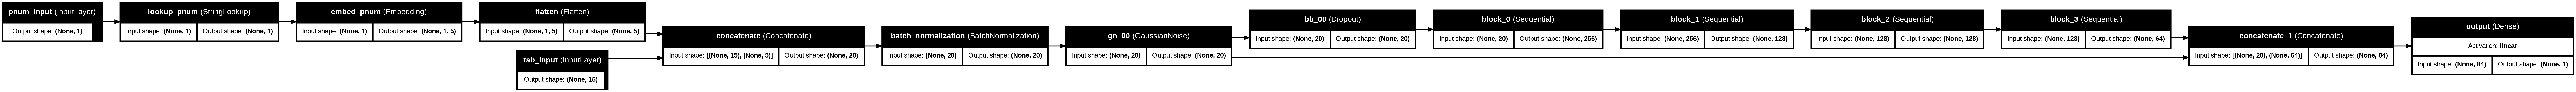

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

#### Main Function:

In [29]:
def run_experiment(X_train, X_test, model_constructor, best_params, experiment_name="baseline_nn_ext", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, n_splits = 5, n_repeats = 5, vocabulary=vocabulary_pnum,
                   patience=11,patience_reduce=5):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(n_repeats*n_splits)))
  train_results_df = pd.DataFrame(index=X_train.index, columns=list(range(n_repeats*n_splits)))

  all_mse = []
  all_rmse = []

  rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=36851234)

  for i, (train_index, val_index) in enumerate(rskf.split(X_train, X_train["p_num"])):
      print(f"\nRunning CV {i}\n")
      X, val_X = X_train.iloc[train_index], X_train.iloc[val_index]
      y, val_y = X_train[target].iloc[train_index], X_train[target].iloc[val_index]
      X_test = X_test.copy()
      #################################################################### Prepare Datasets loaders:
      train_dataset = dataframe_to_dataset(X, batch_size=batch_size, shuffle=True)
      valid_dataset = dataframe_to_dataset(val_X, batch_size=batch_size, shuffle=False)
      test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

      ##################################################################### Relevant Folders
      folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
      ##################################################################### Generate and Fit Model
      # Callbacks:
      checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}_{i}.weights.h5'

      # Generate the Model:
      model = model_constructor(vocabulary=vocabulary,
                                lr = learning_rate,
                                **best_params)
      if i>=0:
        print("Start training the model...")

        history = model.fit(train_dataset,
                            epochs=num_epochs,
                            callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse',
                                                                     patience=patience,
                                                                     mode="min",
                                                                     start_from_epoch=5,
                                                                     restore_best_weights=True),
                                      keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                                      save_weights_only=True,
                                                                      monitor="val_rmse",
                                                                      mode='min',
                                                                      save_best_only=True),
                                      keras.callbacks.ReduceLROnPlateau(monitor='val_rmse',
                                                                        factor=0.5,
                                                                        patience=patience_reduce,
                                                                        min_lr=0.0001,
                                                                        mode="min")],
                            validation_data=valid_dataset)

        print("Model training finished")

      model.load_weights(checkpoint_filepath)
      model.evaluate(valid_dataset, verbose=0)

      if i>=0:
        plot_training_session(history)

      oof_res = model.predict(valid_dataset)
      test_pred = model.predict(test_dataset)

      print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

      rmse_score = root_mean_squared_error(val_y, oof_res)


      fig, axs = plt.subplots(1,1, figsize=(10,4))
      axs.scatter(oof_res, val_y)
      axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
      plt.tight_layout()
      plt.show()

      print(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")

      ##################################################################### Save the Model
      model.save(f"{folders_experiment}/model_{experiment_name}.keras")

      ##################################################################### Create Model Output
      test_results_df.loc[:,i] = test_pred
      all_rmse.append(round(rmse_score, 3))

      #############
      train_results_df.iloc[val_index,i] = oof_res.flatten()

      gc.collect()

    ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df, train_results_df

#### Keras Tuner:

In [30]:
tuning_on=False
gc.collect()

7058

 Select a Validation set:

In [31]:
if tuning_on==True:
  Xt, Xv = train_test_split(X_train, test_size=0.20, random_state=42, stratify=X_train['p_num'])

  print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [32]:
if tuning_on==True:
  vocabulary = Xt["p_num"].unique().tolist()

  train_dataset = dataframe_to_dataset(Xt, batch_size=512, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=512, shuffle=False)

In [33]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('activation', ["relu","silu","gelu","selu"])
  hp.Float('dropout',0.15,0.40, step=0.025)
#  hp.Float('noise',0.05,0.1, step=0.025)
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log")
  hp.Choice('num_dense_blocks', values=[1,2,3,4])
  hp.Choice('units_dense', values=[128,256,512])

In [34]:
def create_turner_model(hp):

  model = create_model_v0(vocabulary=vocabulary,
                          dense_layers=[hp.get('units_dense')]+[int(hp.get('units_dense')/2)]*hp.get('num_dense_blocks')+[int(hp.get('units_dense')/4)],
                          dropout=hp.get('dropout'),
                          activation=hp.get('activation'),
                          noise=0, #hp.get('noise'),
                          reg=hp.get('reg'),
                          lr=0.0025)
  return model

In [35]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=16, callbacks=[stop_early,reduce_])


    val_rmse: 1.7364014387130737

    Best val_rmse So Far: 1.736088514328003
    Total elapsed time: 05h 27m 20s

    Search: Running Trial #32

    Value             |Best Value So Far |Hyperparameter
    relu              |silu              |activation
    0.375             |0.35              |dropout
    0.01              |0.001             |reg
    4                 |1                 |num_dense_blocks
    128               |512               |units_dense


In [36]:
if tuning_on==True:
  tuner.results_summary(num_trials=10)

In [37]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'activation': 'gelu', 'dropout': 0.15, 'reg': 0.0001, 'num_dense_blocks': 1, 'units_dense': 128}
* {'activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'num_dense_blocks': 1, 'units_dense': 512}
* {'activation': 'relu', 'dropout': 0.375, 'reg': 0.0001, 'num_dense_blocks': 1, 'units_dense': 512}
* {'activation': 'relu', 'dropout': 0.175, 'reg': 0.1, 'num_dense_blocks': 3, 'units_dense': 128}

* Trial 47 summary
Hyperparameters:
activation: gelu
dropout: 0.15
reg: 0.0001
num_dense_blocks: 1
units_dense: 128
Score: 1.727567195892334

* Trial 11 summary
Hyperparameters:
activation: silu
dropout: 0.35
reg: 0.001
num_dense_blocks: 1
units_dense: 512
Score: 1.736088514328003

* Trial 35 summary
Hyperparameters:
activation: relu
dropout: 0.375
reg: 0.0001
num_dense_blocks: 1
units_dense: 512
Score: 1.7361124753952026

* Trial 13 summary
Hyperparameters:
activation: relu
dropout: 0.175
reg: 0.1
num_dense_blocks: 3
units_dense: 128
Score: 1.7361220121383667

* Trial 14 summary
Hyperparameters:
activation: gelu
dropout: 0.275
reg: 0.001
num_dense_blocks: 1
units_dense: 512
Score: 1.7361259460449219

* Trial 26 summary
Hyperparameters:
activation: selu
dropout: 0.375
reg: 0.0001
num_dense_blocks: 4
units_dense: 128
Score: 1.7361326217651367

#### Fit The Model:

In [38]:
#del df_train_scaled #Xt, Xv, train_dataset, valid_dataset, stop_early, reduce_#, tuner
gc.collect()

0

In [39]:
bas = 512
rep=1
[bas]+[int(bas/2)]*rep+[int(bas/4)]

[512, 256, 128]

In [40]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'gelu', 'dropout': 0.15, 'reg': 0.0001, 'dense_layers': [128,64,32]}


Running CV 0

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 30.5248 - mae: 3.8383 - rmse: 4.7062 - val_loss: 3.4083 - val_mae: 1.3098 - val_rmse: 1.7650 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 4.0809 - mae: 1.4154 - rmse: 1.8733 - val_loss: 3.0417 - val_mae: 1.2895 - val_rmse: 1.7263 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 3.2955 - mae: 1.3217 - rmse: 1.7626 - val_loss: 3.0030 - val_mae: 1.2979 - val_rmse: 1.7275 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0971 - mae: 1.3004 - rmse: 1.7393 - val_loss: 2.9736 - val_mae: 1.2942 - val_rmse: 1.7219 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0419 - mae: 1.2975 - rmse: 1.7358 - val_loss: 2.9606 - val_mae: 1.2898 - val_rmse: 1.7187 - learning_rate: 5.0000e-04
Epoch 6/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━

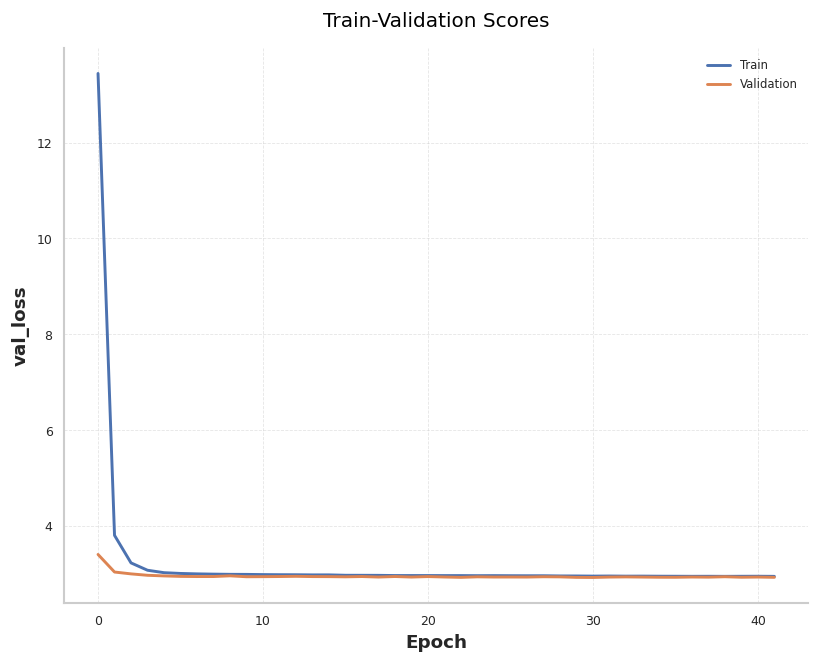

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700312,),(700312, 1)


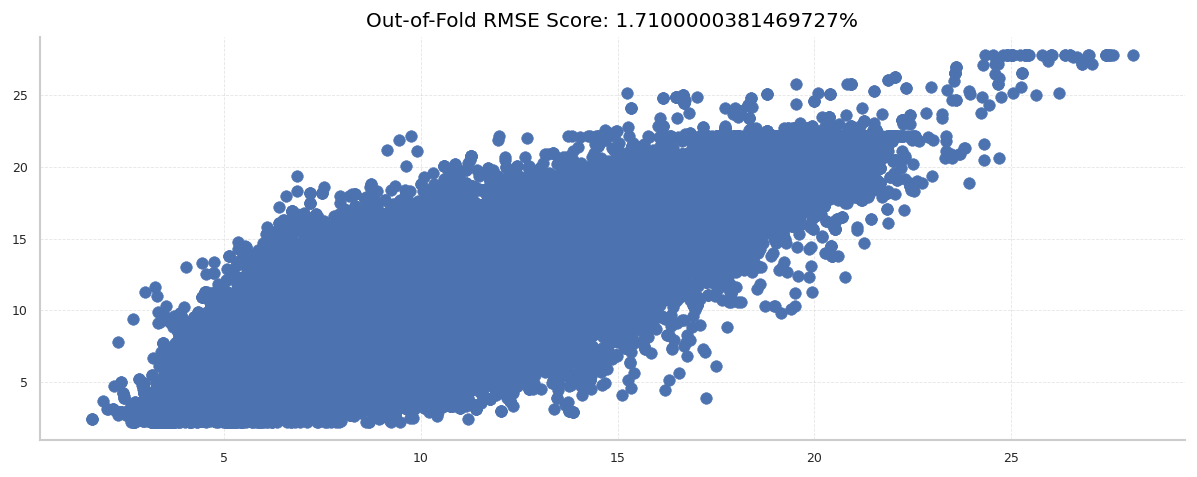

Out-of-Fold RMSE Score: 1.7100000381469727%

Running CV 1

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 29.5550 - mae: 3.7793 - rmse: 4.6397 - val_loss: 3.3631 - val_mae: 1.3191 - val_rmse: 1.7578 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 4.0984 - mae: 1.4210 - rmse: 1.8804 - val_loss: 3.0956 - val_mae: 1.3147 - val_rmse: 1.7410 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.3435 - mae: 1.3324 - rmse: 1.7745 - val_loss: 3.0058 - val_mae: 1.2966 - val_rmse: 1.7272 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 3.1263 - mae: 1.3063 - rmse: 1.7458 - val_loss: 3.0001 - val_mae: 1.3038 - val_rmse: 1.7293 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0596 - mae: 1.3007 - rmse: 1.7399 - val_loss: 2.9575 - val_mae: 1.2878 - val_rmse: 1.7181 - learning_rate: 5.0000e-

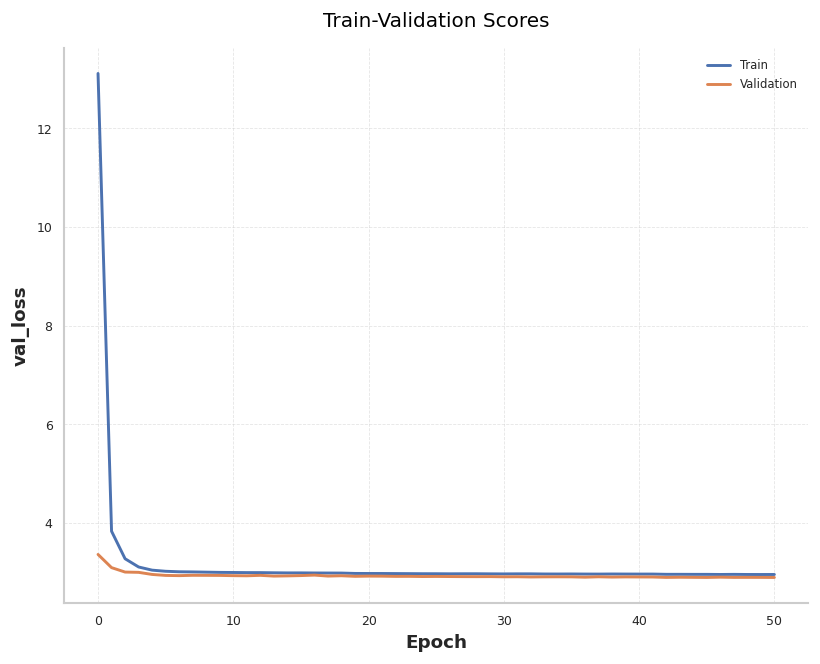

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


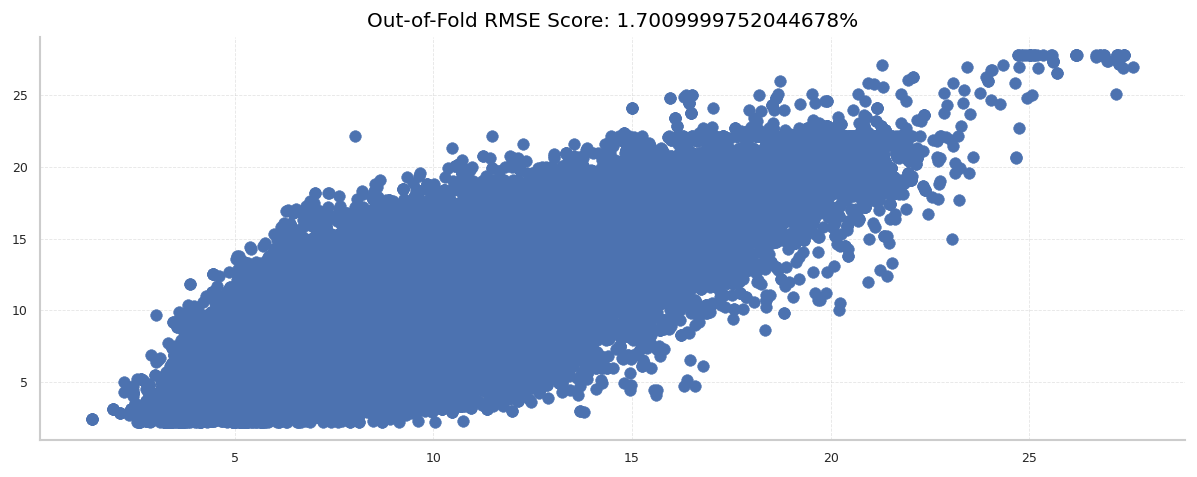

Out-of-Fold RMSE Score: 1.7009999752044678%

Running CV 2

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 32.4356 - mae: 3.9974 - rmse: 4.8911 - val_loss: 3.4617 - val_mae: 1.3351 - val_rmse: 1.7804 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 4.0868 - mae: 1.4172 - rmse: 1.8763 - val_loss: 3.1043 - val_mae: 1.3154 - val_rmse: 1.7399 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.2963 - mae: 1.3222 - rmse: 1.7628 - val_loss: 3.0774 - val_mae: 1.3260 - val_rmse: 1.7475 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.1014 - mae: 1.3027 - rmse: 1.7410 - val_loss: 3.0013 - val_mae: 1.3062 - val_rmse: 1.7293 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0481 - mae: 1.2990 - rmse: 1.7374 - val_loss: 2.9639 - val_mae: 1.2894 - val_rmse: 1.7197 - learning_rate: 5.0000e-

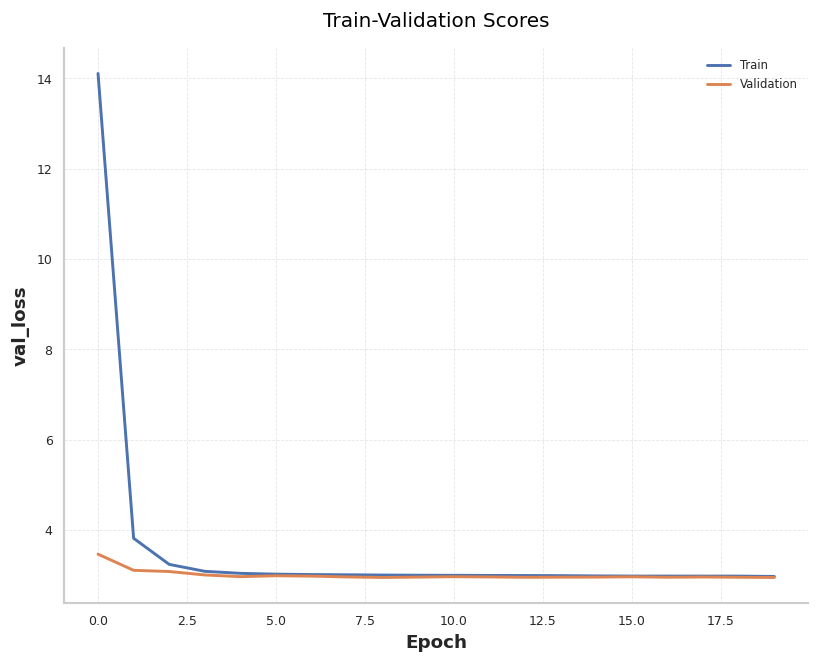

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


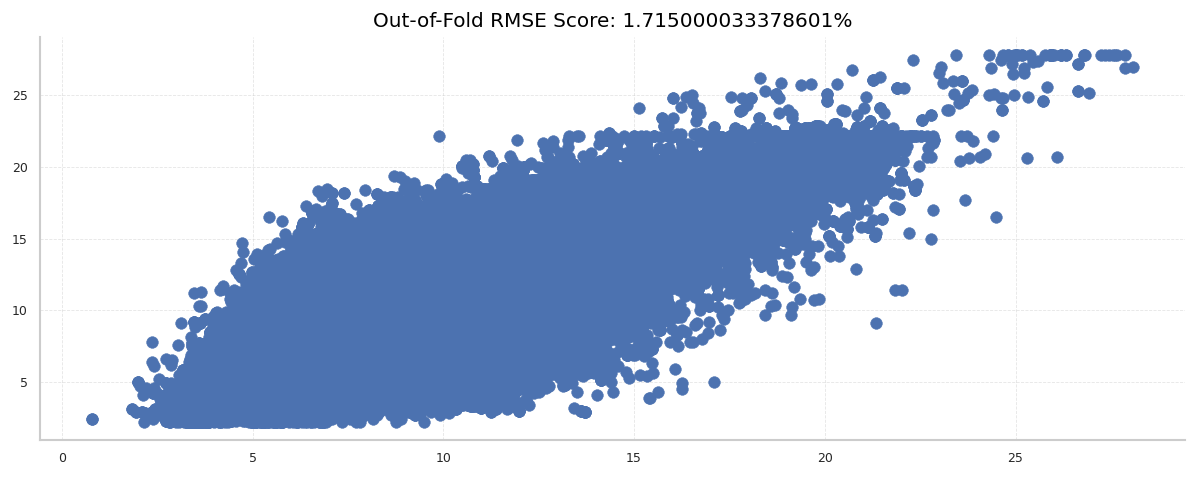

Out-of-Fold RMSE Score: 1.715000033378601%

Running CV 3

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 33.1714 - mae: 4.0798 - rmse: 4.9759 - val_loss: 3.7584 - val_mae: 1.4060 - val_rmse: 1.8597 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 4.3051 - mae: 1.4599 - rmse: 1.9323 - val_loss: 3.1459 - val_mae: 1.3294 - val_rmse: 1.7500 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.3636 - mae: 1.3347 - rmse: 1.7778 - val_loss: 3.0321 - val_mae: 1.3157 - val_rmse: 1.7343 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.1014 - mae: 1.3029 - rmse: 1.7410 - val_loss: 2.9831 - val_mae: 1.2977 - val_rmse: 1.7241 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0324 - mae: 1.2958 - rmse: 1.7332 - val_loss: 2.9981 - val_mae: 1.3080 - val_rmse: 1.7297 - learning_rate: 5.0000e-0

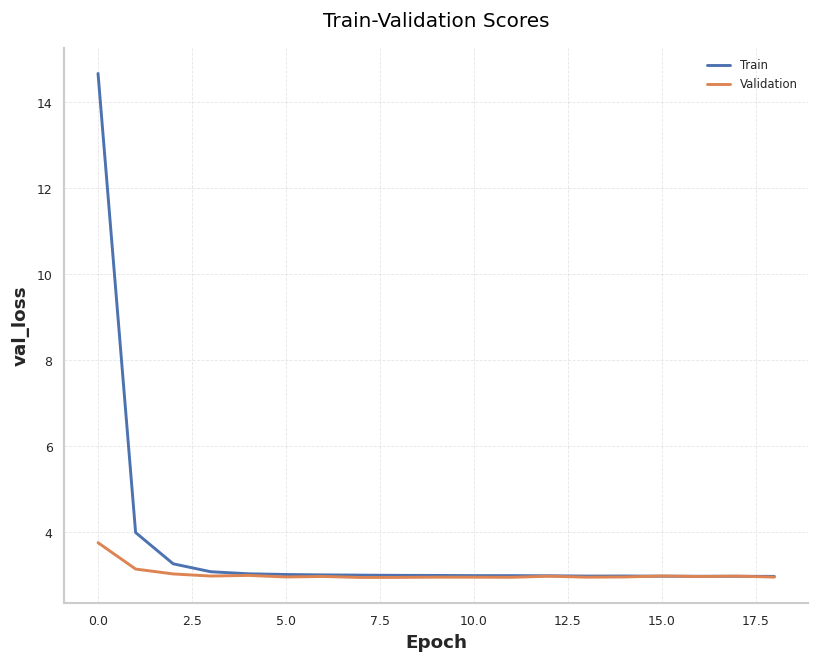

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700312,),(700312, 1)


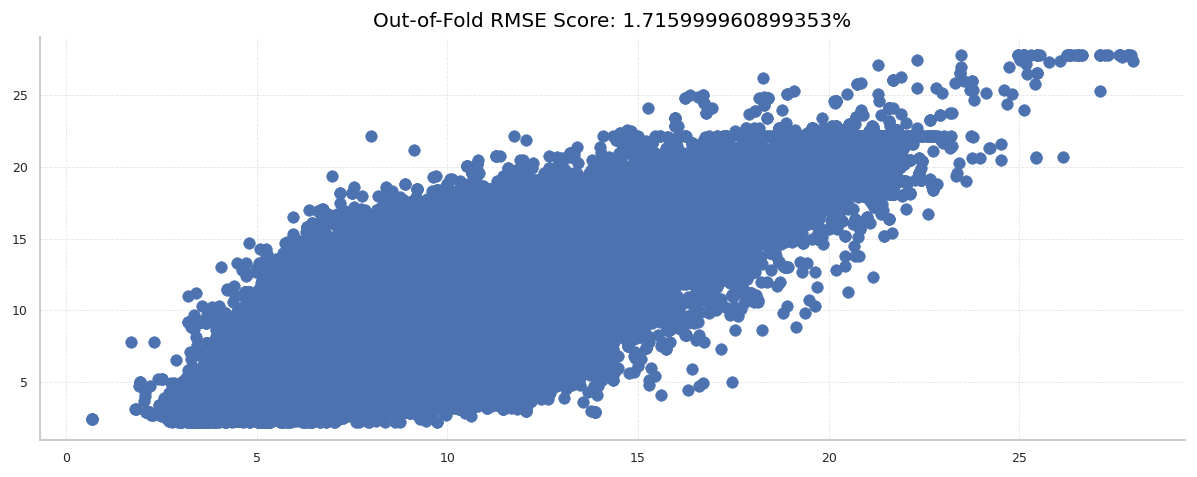

Out-of-Fold RMSE Score: 1.715999960899353%

Running CV 4

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 30.6774 - mae: 3.9135 - rmse: 4.7812 - val_loss: 3.3148 - val_mae: 1.2977 - val_rmse: 1.7464 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.9463 - mae: 1.3942 - rmse: 1.8471 - val_loss: 3.0371 - val_mae: 1.2905 - val_rmse: 1.7271 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3.2677 - mae: 1.3189 - rmse: 1.7590 - val_loss: 2.9739 - val_mae: 1.2886 - val_rmse: 1.7197 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0896 - mae: 1.3000 - rmse: 1.7387 - val_loss: 2.9579 - val_mae: 1.2859 - val_rmse: 1.7176 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0276 - mae: 1.2944 - rmse: 1.7322 - val_loss: 2.9580 - val_mae: 1.2895 - val_rmse: 1.7180 - learning_rate: 5.0000e-0

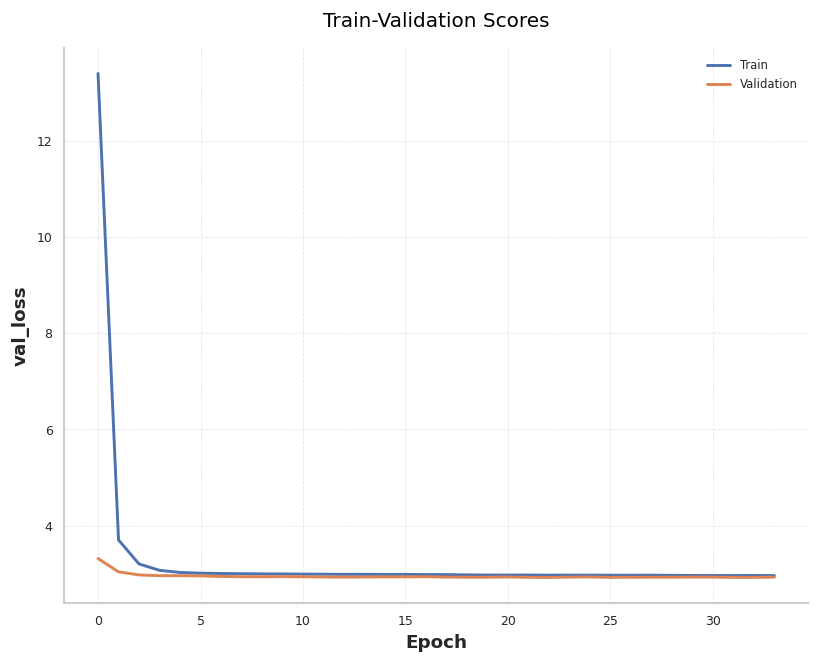

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


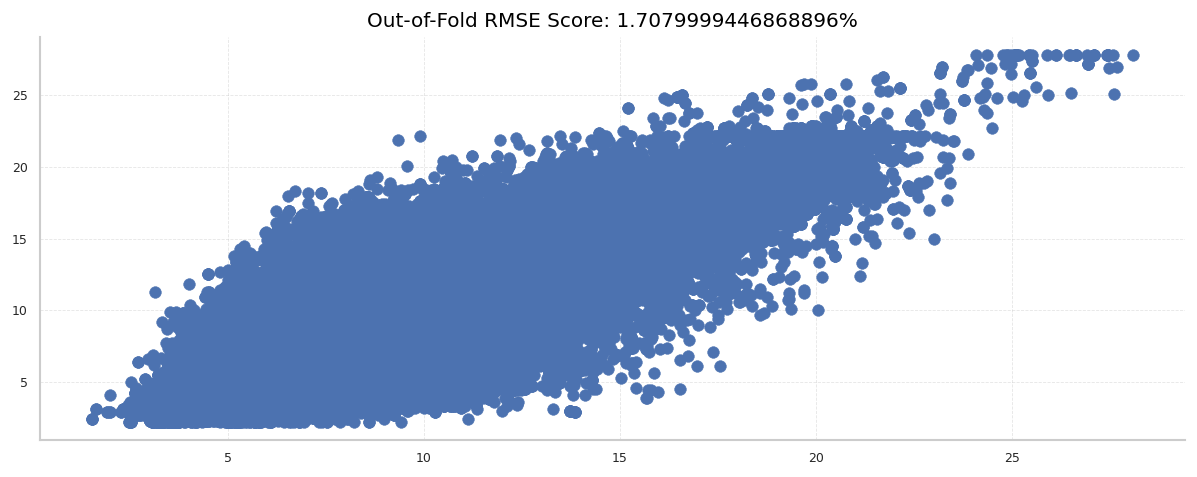

Out-of-Fold RMSE Score: 1.7079999446868896%

Running CV 5

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 29.3886 - mae: 3.7508 - rmse: 4.6125 - val_loss: 3.4682 - val_mae: 1.3235 - val_rmse: 1.7735 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 4.1327 - mae: 1.4208 - rmse: 1.8807 - val_loss: 3.0582 - val_mae: 1.2944 - val_rmse: 1.7298 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3.3017 - mae: 1.3223 - rmse: 1.7628 - val_loss: 2.9739 - val_mae: 1.2825 - val_rmse: 1.7192 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0975 - mae: 1.3021 - rmse: 1.7401 - val_loss: 2.9703 - val_mae: 1.2935 - val_rmse: 1.7210 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0299 - mae: 1.2956 - rmse: 1.7326 - val_loss: 2.9546 - val_mae: 1.2862 - val_rmse: 1.7172 - learning_rate: 5.0000e-

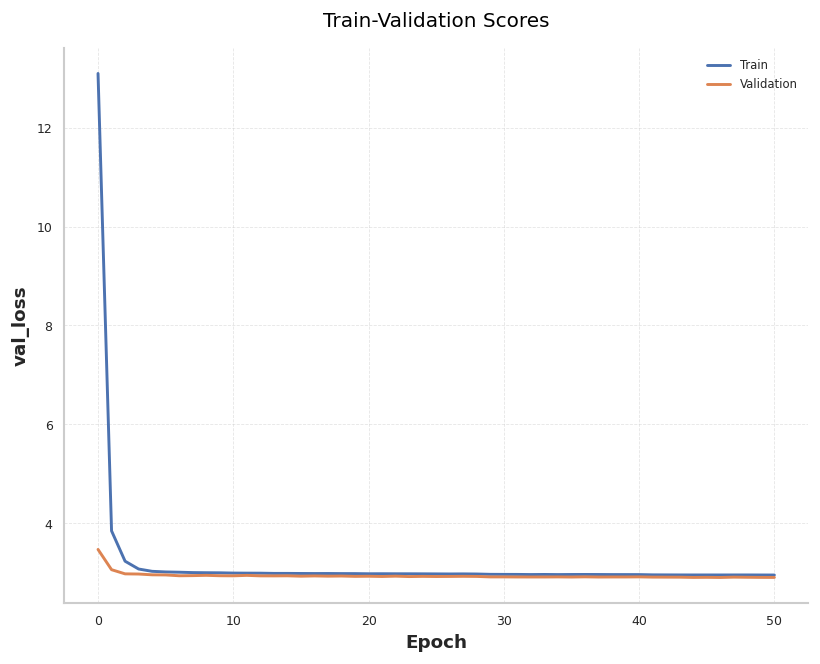

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


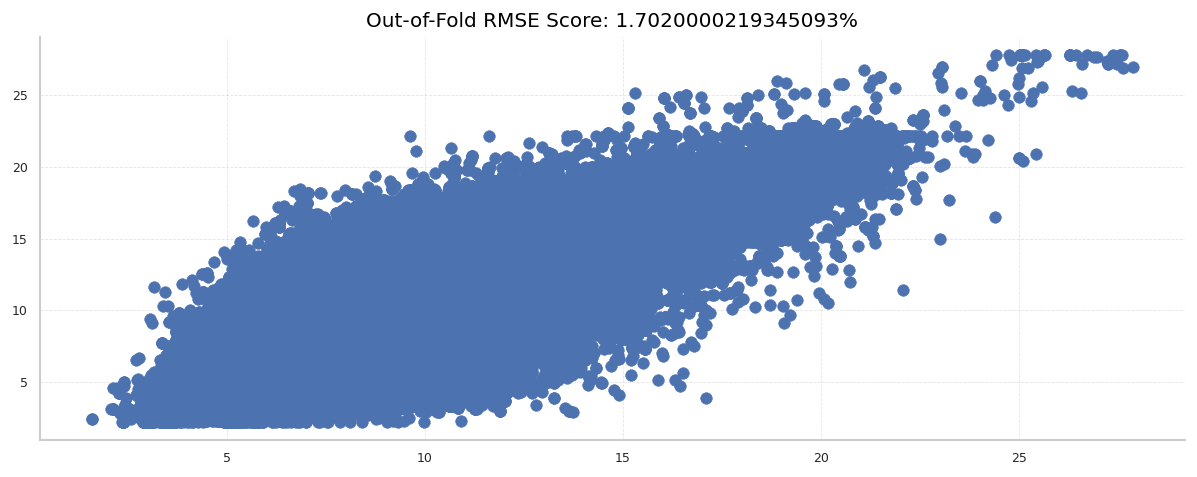

Out-of-Fold RMSE Score: 1.7020000219345093%

Running CV 6

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 38.1274 - mae: 4.4688 - rmse: 5.4141 - val_loss: 3.3139 - val_mae: 1.3272 - val_rmse: 1.7599 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.8901 - mae: 1.3874 - rmse: 1.8436 - val_loss: 3.0591 - val_mae: 1.3081 - val_rmse: 1.7347 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.2450 - mae: 1.3170 - rmse: 1.7594 - val_loss: 2.9695 - val_mae: 1.2878 - val_rmse: 1.7193 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0824 - mae: 1.3001 - rmse: 1.7406 - val_loss: 2.9523 - val_mae: 1.2849 - val_rmse: 1.7160 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 3.0353 - mae: 1.2962 - rmse: 1.7357 - val_loss: 2.9532 - val_mae: 1.2928 - val_rmse: 1.7165 - learning_rate: 5.0000e-

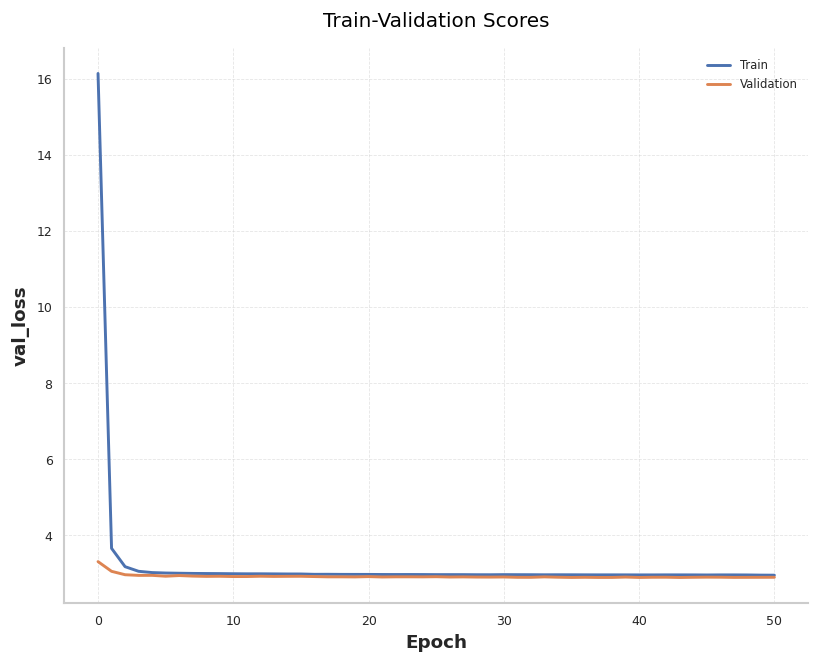

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700312,),(700312, 1)


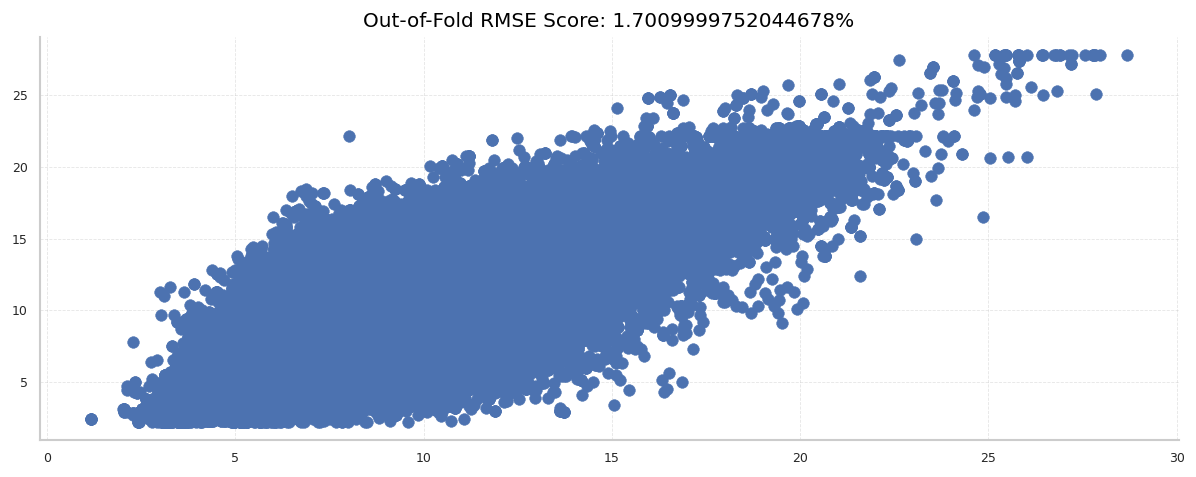

Out-of-Fold RMSE Score: 1.7009999752044678%

Running CV 7

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 32.7882 - mae: 4.0546 - rmse: 4.9516 - val_loss: 3.3848 - val_mae: 1.3109 - val_rmse: 1.7665 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 4.0070 - mae: 1.4052 - rmse: 1.8635 - val_loss: 3.0517 - val_mae: 1.2988 - val_rmse: 1.7286 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3.2774 - mae: 1.3182 - rmse: 1.7592 - val_loss: 2.9808 - val_mae: 1.2894 - val_rmse: 1.7220 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0961 - mae: 1.3016 - rmse: 1.7400 - val_loss: 2.9750 - val_mae: 1.2952 - val_rmse: 1.7231 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0272 - mae: 1.2948 - rmse: 1.7325 - val_loss: 2.9614 - val_mae: 1.2916 - val_rmse: 1.7193 - learning_rate: 5.0000e-

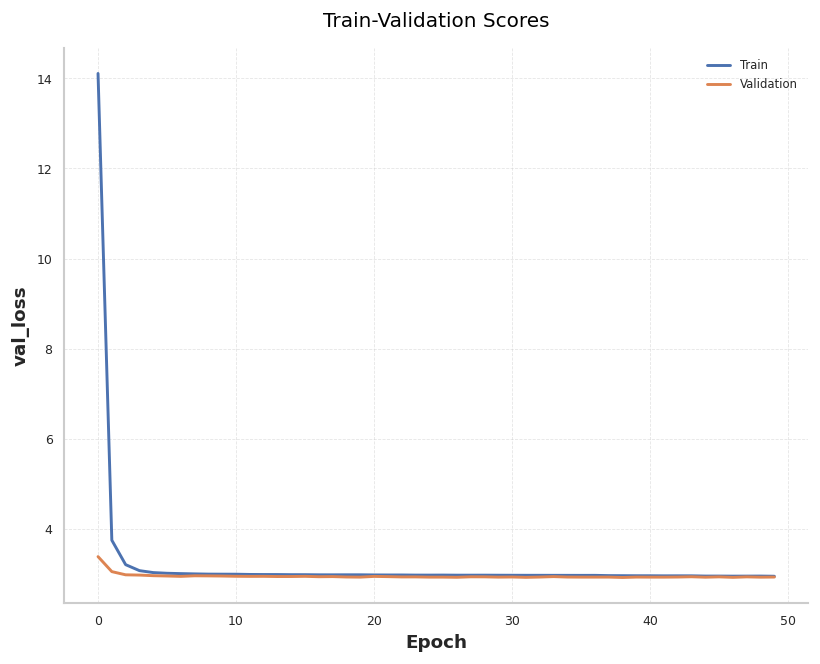

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


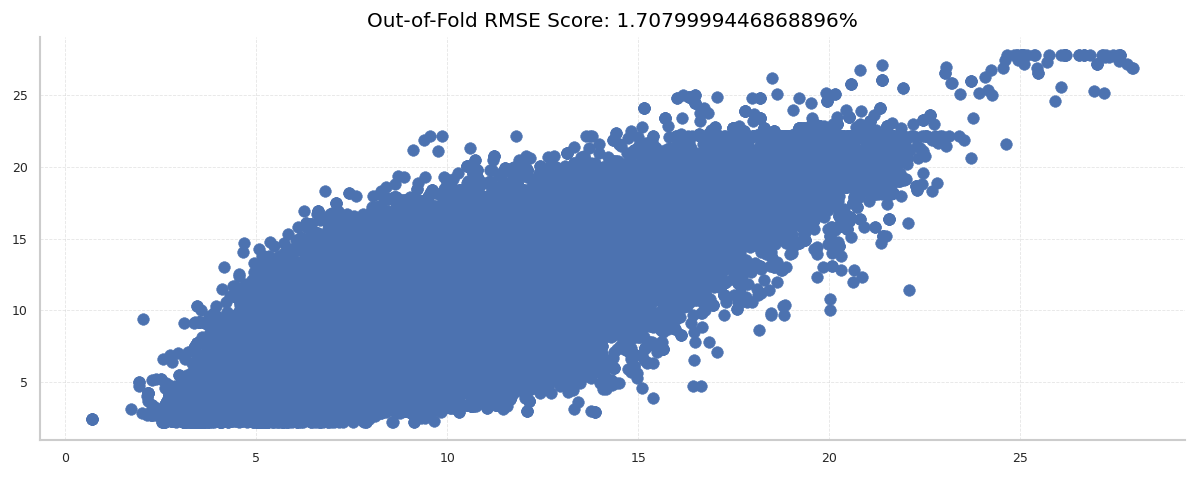

Out-of-Fold RMSE Score: 1.7079999446868896%

Running CV 8

Start training the model...
Epoch 1/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 32.2681 - mae: 3.9818 - rmse: 4.8822 - val_loss: 3.4783 - val_mae: 1.3404 - val_rmse: 1.7821 - learning_rate: 5.0000e-04
Epoch 2/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 4.1422 - mae: 1.4281 - rmse: 1.8903 - val_loss: 3.0569 - val_mae: 1.3033 - val_rmse: 1.7295 - learning_rate: 5.0000e-04
Epoch 3/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3.3138 - mae: 1.3266 - rmse: 1.7674 - val_loss: 2.9986 - val_mae: 1.2970 - val_rmse: 1.7261 - learning_rate: 5.0000e-04
Epoch 4/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 3.0922 - mae: 1.3005 - rmse: 1.7386 - val_loss: 2.9756 - val_mae: 1.2926 - val_rmse: 1.7225 - learning_rate: 5.0000e-04
Epoch 5/51
2736/2736 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 3.0319 - mae: 1.2962 - rmse: 1.7333 - val_loss: 2.9674 - val_mae: 1.2924 - val_rmse: 1.7209 - learning_rate: 5.0000e-

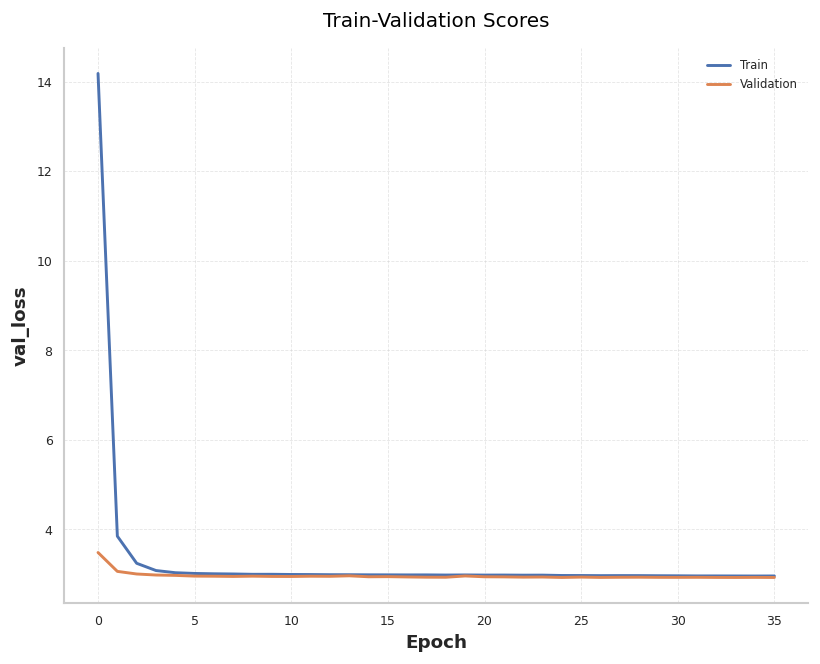

1368/1368 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Out-of-Fold Shapes: (700311,),(700311, 1)


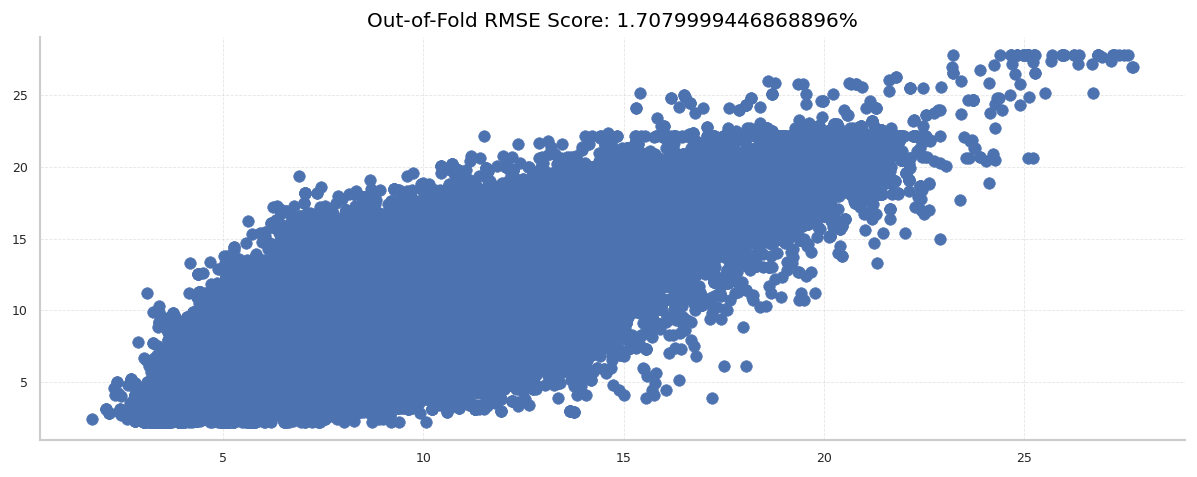

Out-of-Fold RMSE Score: 1.7079999446868896%
All Valuation RMSE: [1.71, 1.701, 1.715, 1.716, 1.708, 1.702, 1.701, 1.708, 1.708]


In [42]:
test_results_df, train_results_df = run_experiment(X_train, X_test, create_model_v0, best_params, experiment_name = "baseline_nn_ext_v2_st",
                                                  rs=42, target="bg+1:00", batch_size=512, num_epochs=51, learning_rate=0.0005,
                                                  n_splits = 3, n_repeats = 3, vocabulary = vocabulary_pnum)

All Valuation RMSE: [2.195, 1.99, 2.329, 0.841]

In [43]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

,0,1,2,3,4,5,6,7,8,average
id,,,,,,,,,,
p01_8459,9.049550,8.935773,8.977211,9.124967,8.892013,8.873383,8.940768,8.94383,8.85894,8.955159
p01_8460,5.701726,5.542679,5.629407,5.711843,5.585362,5.522484,5.600604,5.626387,5.434034,5.594947
p01_8461,7.359975,7.251401,7.299907,7.383266,7.212208,7.235614,7.370488,7.274333,7.156846,7.282671
p01_8462,11.856285,11.720918,11.772868,11.810452,11.723727,11.770655,11.975585,11.690506,11.777788,11.788754
p01_8463,9.817020,9.775991,10.090324,10.11805,9.837071,9.500398,9.851692,9.85009,9.867977,9.856513
...,...,...,...,...,...,...,...,...,...,...
p24_256,6.828413,6.894637,6.717556,6.61738,6.906231,6.863344,6.983637,6.833891,6.883094,6.836465
p24_257,10.060814,10.093961,9.871546,9.65915,9.831803,10.040991,10.049814,9.798145,10.13092,9.948572
p24_258,6.938651,6.936656,6.84469,6.659158,6.978883,6.971089,7.060889,6.919333,6.925149,6.914944


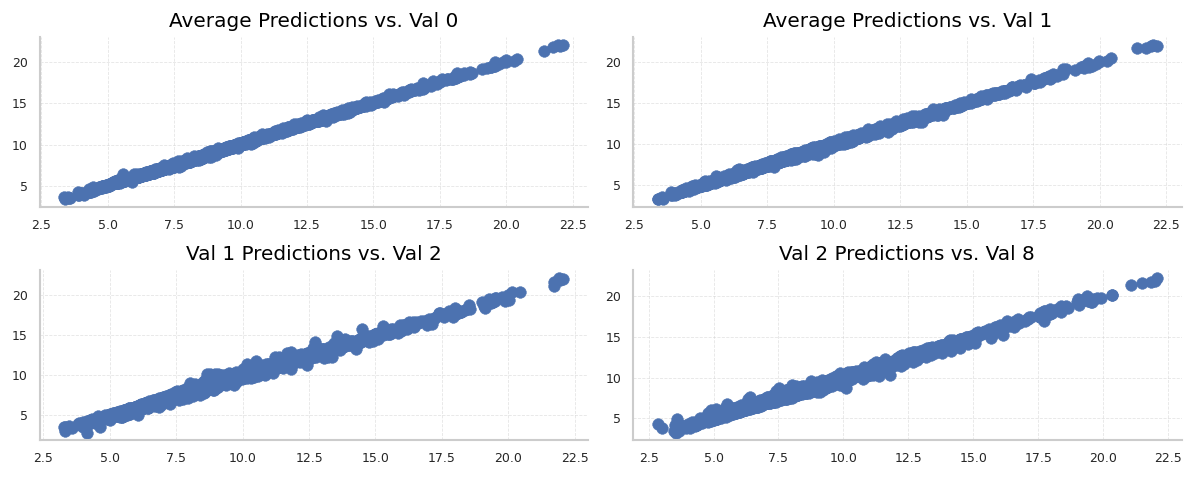

In [44]:
fig, axs = plt.subplots(2,2, figsize=(10,4))
axs = np.ravel(axs)

axs[0].scatter(test_results_df["average"], test_results_df[0])
axs[0].set_title("Average Predictions vs. Val 0")

axs[1].scatter(test_results_df["average"], test_results_df[1])
axs[1].set_title("Average Predictions vs. Val 1")

axs[2].scatter(test_results_df[1], test_results_df[2])
axs[2].set_title("Val 1 Predictions vs. Val 2")

axs[3].scatter(test_results_df[2], test_results_df[8])
axs[3].set_title("Val 2 Predictions vs. Val 8")

plt.tight_layout()
plt.show()

#### **STORE RESULTS**

In [45]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [46]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v2_{col}_expanded_st.csv", index=False)
  print(sub.isna().sum())

id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64
id         0
bg+1:00    0
dtype: int64


In [47]:
train_results_df.head(10)

,0,1,2,3,4,5,6,7,8
0,NaN,16.026049,NaN,15.892423,NaN,NaN,NaN,15.807389,NaN
1,NaN,18.248541,NaN,NaN,NaN,18.119057,NaN,17.982409,NaN
2,NaN,17.160782,NaN,NaN,17.10177,NaN,NaN,16.97154,NaN
3,17.257715,NaN,NaN,NaN,17.292986,NaN,17.287046,NaN,NaN
4,NaN,NaN,18.846575,NaN,NaN,18.896988,NaN,NaN,18.986736
5,NaN,19.237486,NaN,NaN,NaN,19.344019,NaN,NaN,19.322636
6,18.801252,NaN,NaN,NaN,NaN,18.836588,NaN,NaN,18.84499
7,17.647226,NaN,NaN,NaN,17.700403,NaN,NaN,NaN,17.614758
8,15.929684,NaN,NaN,16.067303,NaN,NaN,15.877246,NaN,NaN
9,15.388386,NaN,NaN,15.487044,NaN,NaN,NaN,15.328547,NaN


In [48]:
train_results_df["average"] = train_results_df.mean(axis=1)
train_results_df.isna().sum()

,0
0,1400622
1,1400623
2,1400623
3,1400622
4,1400623
5,1400623
6,1400622
7,1400623
8,1400623
average,0


In [49]:
train_results_df_ = train_results_df["average"].astype("float").copy()
train_results_df_.columns = ["bg+1:00_v0_expanded"]
train_results_df_.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/train_results_v2_expanded_st.csv.csv")

## **2.2 MODEL 02**

### 2.1.1 Create Dataloader:

In [ ]:
gc.collect()

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, flds = ts_fields):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    timeseries_df = dataframe[flds].values
    timeseries_df = timeseries_df.reshape((-1, 72, 8))
    static_df = dataframe.drop(columns=flds)


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6"]].values,  # Fourth input
                                              timeseries_df),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4, x5), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
X_train.cluster_pca.unique()
#list(range(0,60,5))

In [ ]:
def create_model_v1(dense_layers=[32,16],
                    dropout=0.3, conv_layers=[128,64,32],
                    activation="selu", reg=0.0,lr=0.001,
                    return_sequences=[64,32], summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(15,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = dense_block(den,dropout=dropout,activation=activation, reg=reg, name=f"block_{num}")(tabular_output)

  # --- Time Series Data Processing ---
  # Input layer for time series data
  time_series_input = keras.Input(shape=(72, 8), name="time_series_input")
  x=time_series_input
  # LSTM layers for time series data
  for i in conv_layers:
    x = layers.Conv1D(filters=i, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.LayerNormalization()(x)
    x = layers.SpatialDropout1D(dropout)(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

  x = layers.Flatten()(x)
  # --- Combine Tabular and Time Series Data ---
  # Concatenate the outputs from both branches
  concatenated = layers.concatenate([tabular_output, x])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(concatenated)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input,time_series_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v1(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[2]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","gelu","selu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128,64])
  hp.Choice('conv_layers', values=[512,256,128,64])

In [ ]:
def create_turner_model(hp):

  model = create_model_v1(dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                          dropout=hp.get('dropout'),
                          conv_layers=[hp.get('conv_layers'),int(hp.get('conv_layers')/2),int(hp.get('conv_layers')/4)],
                          activation=hp.get('main_activation'),
                          reg=hp.get('reg'),
                          lr=0.0025,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 512, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.30, 'reg': 0.001, 'dense_layers': 128, 'conv_layers': 64}
* {'main_activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'dense_layers': 256, 'conv_layers': 64}

* **Trial 21 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 64
Score: 1.9809489250183105

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 64
Score: 1.9827678203582764

* **Trial 10 summary**
Hyperparameters:
main_activation: silu
dropout: 0.30000000000000004
reg: 0.001
dense_layers: 128
conv_layers: 64
Score: 1.9926979541778564

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.001
dense_layers: 256
conv_layers: 64
Score: 1.9969719648361206

* **Trial 18 summary**
Hyperparameters:
main_activation: relu
dropout: 0.2
reg: 0.0001
dense_layers: 64
conv_layers: 64
Score: 2.0100858211517334

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': [512,256,128], 'conv_layers': [64,32,16]}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v1, best_params, split=val_sets,
                                 experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v0_{col}.csv", index=False)
  print(sub.isna().sum())

## **2.3 MODEL 03**

### 3.1.1 Create Dataloader:

In [ ]:
gc.collect()

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32, flds = ts_fields):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    timeseries_df = dataframe[flds].values
    timeseries_df = timeseries_df.reshape((-1, 72, 8))
    static_df = dataframe.drop(columns=flds)


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6"]].values,  # Fourth input
                                              timeseries_df),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4, x5), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,x5.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
def residual_block(input_tensor, filters, kernel_size, strides=1):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = layers.LayerNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout1D(0.2)(x)

    # Residual connection
    if strides > 1 or input_tensor.shape[-1] != filters:
        residual = layers.Conv1D(filters, 1, strides=strides, padding='same')(input_tensor)
    else:
        residual = input_tensor

    x = layers.add([x, residual])
    x = layers.MaxPooling1D(pool_size=2)(x)
    return x

In [ ]:
def create_model_v2(dense_layers=[256,128,128,128,64],
                    dropout=0.3, conv_layers=[1024,512,256,128],
                    activation="selu", reg=0.0,lr=0.001,strides=1,kernel_size=3, summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(15,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    tabular_output = residual_block_dense(tabular_output, den, activation=activation, normalization_type='batch', dropout_rate=dropout, name=f"block_{num}",  reg=reg,)

  # --- Time Series Data Processing ---
  # Input layer for time series data
  time_series_input = keras.Input(shape=(72, 8), name="time_series_input")
  x=time_series_input
  # LSTM layers for time series data
  for sup, i in enumerate(conv_layers):
      input_tensor = x
      x = layers.Conv1D(filters=i, kernel_size=3, strides=strides, padding='same',name=f"conv_{sup}")(x)
      x = layers.LayerNormalization(name=f"lnorm_{sup}")(x)
      x = layers.Activation('relu',name=f"act_{sup}")(x)
      x = layers.SpatialDropout1D(0.2,name=f"spat_drop_{sup}")(x)

      # Residual connection
      if strides > 1 or time_series_input.shape[-1] != i:
          residual = layers.Conv1D(i, 1, strides=strides, padding='same',name=f"res_conn_{sup}")(input_tensor)
      else:
          residual = input_tensor

      x = layers.add([x, residual],name=f"add_{sup}")
      x = layers.MaxPooling1D(pool_size=2,name=f"max_pool_{sup}")(x)

  x = layers.Flatten(name=f"flatten_conv")(x)
  # --- Combine Tabular and Time Series Data ---
  # Concatenate the outputs from both branches
  concatenated = layers.concatenate([tabular_output, x])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1,
                        name="output",
                        #activity_regularizer=keras.regularizers.l2(reg)
                        )(concatenated)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input,time_series_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v2(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, rankdir="LR", expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v0_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","gelu","selu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128])
  hp.Choice('conv_layers', values=[1024,512,256,128])

In [ ]:
def create_turner_model(hp):

  model = create_model_v2(dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                          dropout=hp.get('dropout'),
                          conv_layers=[hp.get('conv_layers'),int(hp.get('conv_layers')/2),int(hp.get('conv_layers')/4),int(hp.get('conv_layers')/8)],
                          activation=hp.get('main_activation'),
                          reg=hp.get('reg'),
                          lr=0.001,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)
  print(tuner.get_best_hyperparameters(5)[4].values)
  print(tuner.get_best_hyperparameters(6)[5].values)
  print(tuner.get_best_hyperparameters(7)[6].values)

* {'main_activation': 'gelu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'gelu', 'dropout': 0.15, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.275, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'relu', 'dropout': 0.375, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}
* {'main_activation': 'gelu', 'dropout': 0.30, 'reg': 0.0001, 'dense_layers': 128, 'conv_layers': 128}

* **Trial 34 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9520071744918823

* **Trial 30 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.15
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9539700746536255

* **Trial 22 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.954962134361267

* **Trial 24 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9550836086273193

* **Trial 11 summary**
Hyperparameters:
main_activation: relu
dropout: 0.275
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9551788568496704

* **Trial 40 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.955820918083191

* **Trial 37 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.30000000000000004
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9563628435134888

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 128
Score: 1.956717610359192

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.275
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9571396112442017

* **Trial 25 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.325
reg: 0.0001
dense_layers: 256
conv_layers: 128
Score: 1.9579848051071167

* **Trial 44 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.958244800567627

* **Trial 19 summary**
Hyperparameters:
main_activation: relu
dropout: 0.30000000000000004
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9587109088897705

* **Trial 48 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 128
Score: 1.9599860906600952

* **Trial 23 summary**
Hyperparameters:
main_activation: relu
dropout: 0.375
reg: 0.0001
dense_layers: 256
conv_layers: 128
Score: 1.9600061178207397

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.35, 'reg': 0.0001, 'dense_layers': [128,64,64,64,32], 'conv_layers': [128,64,32,16]}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v2, best_params, split=val_sets,
                                 experiment_name="conv_v2_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(2.7,22.5, inplace=True)

In [ ]:
plt.scatter(test_results_df[0],test_results_df[4])

In [ ]:
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df.max(axis=0),test_results_df.min(axis=0)

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v3_{col}_clipped.csv", index=False)
  print(sub.isna().sum())

## **2.4 MODEL 04**

### 3.1.1 Create Dataloader:

In [ ]:
X_train[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4",
          "enc_05_v4","enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7",
          "enc_08_v6","enc_04_v6","bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].describe()

In [ ]:
X_test[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4",
          "enc_05_v4","enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7",
          "enc_08_v6","enc_04_v6","bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].describe()

In [ ]:
gc.collect()

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    static_df = dataframe.copy()


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
                                                         "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].values),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

In [ ]:
#X_train.filter(regex='insulin')

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
def create_model_v3(dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    base=32,
                    rep=4,
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(19,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")
  all_feat = tabular_output

  # Dense layers for tabular data
  for num, den in enumerate(range(1,rep+1)):
    step = residual_block_dense(all_feat, base*den, activation=activation, normalization_type='batch', dropout_rate=dropout, name=f"block_{num}",  reg=reg,)
    all_feat = tf.keras.layers.concatenate([all_feat,step], name=f"concat_step_{num}")

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(all_feat)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v3(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True,
           #rankdir="LR",
           expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v3_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('activation', ["relu","silu","selu","gelu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('rep', values=[3,4,5,6])
#  hp.Choice('base', values=[32,64,128])

In [ ]:
def create_turner_model(hp):

  model = create_model_v3(dropout=hp.get('dropout'),
                          rep=hp.get('rep'),
                          activation=hp.get('activation'),
                          reg=hp.get('reg'),
                          lr=0.0025,
                          summary=False)
  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)
  print(tuner.get_best_hyperparameters(5)[4].values)
  print(tuner.get_best_hyperparameters(6)[5].values)
  print(tuner.get_best_hyperparameters(7)[6].values)

* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.35, 'reg': 0.001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.275, 'reg': 0.0001, 'rep': 4}
* {'activation': 'gelu', 'dropout': 0.275, 'reg': 0.001, 'rep': 4}
* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.001, 'rep': 4}
* {'activation': 'silu', 'dropout': 0.15, 'reg': 0.0001, 'rep': 3}
* {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}


* **Trial 21 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 512
conv_layers: 64
Score: 1.9809489250183105

* **Trial 26 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.0001
dense_layers: 128
conv_layers: 64
Score: 1.9827678203582764

* **Trial 10 summary**
Hyperparameters:
main_activation: silu
dropout: 0.30000000000000004
reg: 0.001
dense_layers: 128
conv_layers: 64
Score: 1.9926979541778564

* **Trial 15 summary**
Hyperparameters:
main_activation: silu
dropout: 0.375
reg: 0.001
dense_layers: 256
conv_layers: 64
Score: 1.9969719648361206

* **Trial 18 summary**
Hyperparameters:
main_activation: relu
dropout: 0.2
reg: 0.0001
dense_layers: 64
conv_layers: 64
Score: 2.0100858211517334

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.0001, 'rep': 4}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v3, best_params, split=val_sets,
                                 experiment_name="conv_v3_nn", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(2.7, 22.5, inplace=True)
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

In [ ]:
check_res = test_results_df.clip(2.7,22.5)

In [ ]:
plt.scatter(check_res[0],check_res[2])

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_conv_v4_{col}_clipped.csv", index=False)
  print(sub.isna().sum())

## **2.5 MODEL 05**

### 3.1.1 Create Dataloader:

In [ ]:
gc.collect()

In [ ]:
# X_train[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
#          "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
#          "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].corr().style.background_gradient(cmap='coolwarm')

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    static_df = dataframe.copy()


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
                                                         "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].values),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
def create_model_v4(dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    dense_layers=[256,128,128,64],
                    norm="batch",
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(19,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  tabular_output = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")
  x = tabular_output

  # Dense layers for tabular data
  for num, den in enumerate(dense_layers):
    x = dense_block(den, dropout=dropout, activation=activation, reg=reg, name=f"Dense_block_{num}", normalization_type=norm)(x)

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(x)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v4(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True,
           #rankdir="LR",
           expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v4_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
512/4

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","silu","selu","gelu"]) #
  hp.Float('dropout',0.15,0.40, step=0.025) #
  hp.Float('reg',0.0001, 1.0,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[512,256,128])
  hp.Choice('norm', values=["batch","layer"])

In [ ]:
def create_turner_model(hp):

  model = create_model_v4(dropout=hp.get('dropout'),
                    activation=hp.get('main_activation'),
                    reg=hp.get('reg'),
                    lr=0.001,
                    dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                    norm=hp.get('norm'))

  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'main_activation': 'gelu', 'dropout': 0.2, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
* {'main_activation': 'gelu', 'dropout': 0.175, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 256, 'norm': 'batch'}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 512, 'norm': 'batch'}

* **Trial 49 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.2
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6541268825531006

* **Trial 23 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.175
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6549822688102722

* **Trial 05 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 256
norm: batch
Score: 0.6553966403007507

* **Trial 25 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 512
norm: batch
Score: 0.6563018560409546

* **Trial 12 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.225
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6568679213523865

* **Trial 48 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.325
reg: 0.0001
dense_layers: 128
norm: layer
Score: 0.6574869155883789

* **Trial 17 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.30000000000000004
reg: 0.1
dense_layers: 512
norm: batch
Score: 0.6574987769126892

* **Trial 26 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.2
reg: 0.01
dense_layers: 128
norm: batch
Score: 0.6576610207557678

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'gelu', 'dropout': 0.2, 'reg': 0.001, 'dense_layers': [128,64,64,32],'norm': 'batch'}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v4, best_params, split=val_sets,
                                 experiment_name="dnn_v0", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(2.7, 22.5, inplace=True)
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_dnn_v0_{col}_clipped.csv", index=False)
  print(sub.isna().sum())

In [ ]:
test_results_df.min(axis=0),test_results_df.max(axis=0)

In [ ]:
plt.scatter(test_results_df[0],test_results_df[1])

## **2.6 MODEL 06**

### 3.1.1 Create Dataloader:

In [ ]:
gc.collect()

In [ ]:
# X_train[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
#          "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
#          "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].corr().style.background_gradient(cmap='coolwarm')

In [ ]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    target = dataframe["bg+1:00"]
    dataframe = dataframe.drop(columns=["bg+1:00"])

    static_df = dataframe.copy()


    ds = tf.data.Dataset.from_tensor_slices(((static_df["hour"].values,  # First input
                                              static_df["minute"].values,  # Second input
                                              static_df["cluster"].values,  # Third input
                                              static_df["cluster_pca"].values,  # Fourth input
                                              static_df[["PC_1","PC_2","PC_3","enc_04_v7","enc_01_v1","enc_07_v7","enc_01_v4","enc_05_v4",
                                                        "enc_03_v6","enc_05_v7","enc_06_v6","enc_01_v6","enc_06_v7","enc_08_v6","enc_04_v6",
                                                         "bg-0:00","insulin_av-0:00","brake-0:00","intake-0:00"]].values),
                                              target))

    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

In [ ]:
train_ds = dataframe_to_dataset(X_train,batch_size=1)

* **TEST THE DATALOADER:**

In [ ]:
for (x0, x1, x2, x3, x4), y in train_ds.take(1):
    print(x0.shape,x1.shape,x2.shape,x3.shape,x4.shape,y.shape)

In [ ]:
#X_train.iloc[:2000,:].to_csv("train_sample.csv")

### **2.1.2 Encoding**

In [ ]:
static_col = list(X_train.drop(columns=ts_fields+["bg+1:00"]).columns)

static_entries = {}

for col in static_col:
    static_entries[col] = X_train[col].nunique()

embed_dim = {'cluster_pca': 3, 'hour': 8, 'minute': 4, 'cluster': 8}
#static_entries

In [ ]:
def encode_tabular(inputs, list_categorical_nn, Cat_Feat_Entries=static_entries, num_dense_exp=False, embedding_dims=embed_dim, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for counter, feature_name in enumerate(inputs):

      vocabulary = Cat_Feat_Entries[feature_name]
      emb_dim = embedding_dims[feature_name]

      embedding = layers.Embedding(input_dim=vocabulary, output_dim=emb_dim, name=f"embedder_{counter}")
      # Convert the index values to embedding representations.
      encoded_categorical_feature = embedding(inputs[feature_name])

      encoded_categorical_feature_list.append(encoded_categorical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [ ]:
X_train.info()

### **2.1.3 Create Models:**

In [ ]:
def create_model_v5(dropout=0.3,
                    activation="selu",
                    reg=0.0,
                    lr=0.001,
                    dense_layers=[256,128,128,64],
                    norm="batch",
                    summary=False):

  # --- Tabular Data Processing ---
  # Input layer for tabular data as a dictionary
  hour_input = keras.Input(shape=(1,), name="hour_input")
  minute_input = keras.Input(shape=(1,), name="minute_input")
  cluster_input = keras.Input(shape=(1,), name="cluster_input")
  pca_input = keras.Input(shape=(1,), name="cluster_pca")
  cont_input = keras.Input(shape=(19,), name="cont_inputs")

  # Lookup Layer for the p_num:
  # pca_lookup = layers.IntegerLookup(vocabulary=list(range(0,4)),mask_token=None,num_oov_indices=0,
  #                                  output_mode="int", name="lookup_pca")
  # pca_encoded = pca_lookup(pca_input)

  # Lookup Layer for the minutes:
  minute_lookup = layers.IntegerLookup(vocabulary=list(range(0,60,5)),mask_token=None,num_oov_indices=0,
                                       output_mode="int", name="lookup_min")

  minute_encoded = minute_lookup(minute_input)

  # Embedding layers for hour and minute
  hour_embedding = layers.Embedding(input_dim=24, output_dim=8, name="embed_hour")(hour_input)
  minute_embedding = layers.Embedding(input_dim=12, output_dim=6, name="embed_minute")(minute_encoded)
  pca_encoded_embedding = layers.Embedding(input_dim=4,output_dim=3, name="embed_pca")(pca_input)

  # Embedding layer for cluster
  cluster_embedding = layers.Embedding(input_dim=22, output_dim=8, name="embed_cluster")(cluster_input)

  # Flatten the embeddings
  hour_flat = layers.Flatten()(hour_embedding)
  minute_flat = layers.Flatten()(minute_embedding)
  cluster_flat = layers.Flatten()(cluster_embedding)
  pca_flat = layers.Flatten()(pca_encoded_embedding)

  # Concatenate all tabular features
  x0 = layers.concatenate([hour_flat, minute_flat, cluster_flat, pca_flat,cont_input],
                                      name="tabular_concat")
  cross = x0
  for _ in dense_layers:
      units = cross.shape[-1]
      x = layers.Dense(units)(cross)
      cross = x0 * x + cross
  cross = layers.BatchNormalization()(cross)


  deep = x0
  for num, units in enumerate(dense_layers):
      deep = dense_block(units, dropout=dropout, activation=activation, reg=reg, name=f"Dense_block_{num}", normalization_type=norm)(deep)

  merged = layers.concatenate([cross, deep])

  # --- Output Layer ---
  # Final dense layer for prediction
  output = layers.Dense(1, name="output")(merged)

  # --- Create and Compile the Model ---
  # Create the model
  model = keras.Model(inputs=[hour_input, minute_input, cluster_input, pca_input,cont_input], outputs=output)

  optimizer= keras.optimizers.Adam(learning_rate=lr)
  metric = RootMeanSquaredError(name="rmse", dtype=None)
  metric_mae = MeanAbsoluteError(name="mae", dtype=None)

  # Compile the model
  model.compile(optimizer=optimizer, loss="mse", metrics=[metric,metric_mae])

  # Print model summary
  if summary==True:
    model.summary()

  return model


#vocabulary = X_train["p_num"].unique().tolist()
model = create_model_v5(summary=True)

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True,
           rankdir="LR",
           expand_nested=True, show_layer_activations=True)

### 2.1.4 Training Functions:

In [ ]:
list(range(len(val_sets)))

#### Main Function:

In [ ]:
def run_experiment(X_train, X_test, model_constructor, best_params, split=val_sets, experiment_name="conv_v5_nn", rs=42, target="bg+1:00",
                   batch_size=64, num_epochs=200, learning_rate=0.001, target_scaler=target_scaler):

  test_predictions = np.zeros((len(X_test),1))
  test_results_df = pd.DataFrame(index=X_test.index, columns=list(range(len(val_sets))))

  all_mse = []
  all_rmse = []

  for i, val_index in enumerate(split):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = X_train.drop(index=val_index)
    X_val = X_train.loc[val_index,:]

#    vocabulary = X_trn["p_num"].unique().tolist()

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = X_test.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/{experiment_name}_{i}/"
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = model_constructor(lr = learning_rate,
                              **best_params)

    print("Start training the model...")
    history = model.fit(train_dataset,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_rmse', patience=17, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_rmse",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=valid_dataset)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(valid_dataset, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(valid_dataset)
    test_pred = model.predict(test_dataset)

    print(f"Out-of-Fold Shapes: {val_y.shape},{oof_res.shape}")

    rmse_score = root_mean_squared_error(val_y, oof_res)

    val_pred = target_scaler.inverse_transform(oof_res)
    real_val_y = target_scaler.inverse_transform(val_y.values.reshape(-1,1))
    test_pred_real = target_scaler.inverse_transform(test_pred)

    rmse_score_original = root_mean_squared_error(real_val_y, val_pred)

    fig, axs = plt.subplots(1,1, figsize=(10,4))
    axs.scatter(val_pred, real_val_y)
    axs.set_title(f"Out-of-Fold RMSE Score: {round(rmse_score, 3)}%")
    plt.tight_layout()
    plt.show()

    print(f"Out-of-Fold RMSE Score Rebased: {round(rmse_score, 3)}%")
    print(f"Out-of-Fold RMSE Score Original: {round(rmse_score_original, 3)}%")

    ##################################################################### Save the Model
    model.save(f"{folders_experiment}/model_{experiment_name}.keras")

    ##################################################################### Create Model Output
    test_results_df.loc[:,i] = test_pred_real
    all_rmse.append(round(rmse_score_original, 3))

    gc.collect()

  ##################################################################### Create Model Output
  print(f"All Valuation RMSE: {all_rmse}")

  return test_results_df

#### Keras Tuner:

In [ ]:
tuning_on=True
gc.collect()

 Select a Validation set:

In [ ]:
valid_index = val_sets[0]
Xt = X_train.drop(index=valid_index)
Xv = X_train.loc[valid_index,:]

print(f"Train Shape: {Xt.shape}, Val Shape: {Xv.shape}")

In [ ]:
if tuning_on==True:

  train_dataset = dataframe_to_dataset(Xt, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(Xv, batch_size=256, shuffle=False)

In [ ]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('activation', ["relu","silu","gelu","mish"]) #
  hp.Float('dropout',0.25,0.40, step=0.025) #
  hp.Float('reg',0.0001, 0.1,step=10,sampling="log") #
  hp.Choice('dense_layers', values=[1028,512,256])
  hp.Choice('norm', values=["batch"])

In [ ]:
def create_turner_model(hp):

  model = create_model_v5(dropout=hp.get('dropout'),
                    activation=hp.get('activation'),
                    reg=hp.get('reg'),
                    lr=0.0005,
                    dense_layers=[hp.get('dense_layers'),int(hp.get('dense_layers')/2),int(hp.get('dense_layers')/4)],
                    norm=hp.get('norm'))

  return model

In [ ]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_rmse", "min"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_rmse', patience=7, mode="min", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_rmse', factor=0.5, patience=3, min_lr=0.0001, mode="min")

  tuner.search(train_dataset, validation_data=valid_dataset, epochs=31, callbacks=[stop_early,reduce_])

    Trial 19 Complete [00h 02m 35s]
    val_rmse: 0.6537328958511353

    Best val_rmse So Far: 0.6537328958511353
    Total elapsed time: 00h 39m 28s

    Search: Running Trial #20

    Value             |Best Value So Far |Hyperparameter
    gelu              |relu              |activation
    0.225             |0.325             |dropout
    0.0001            |0.01              |reg
    512               |512               |dense_layers
    batch             |batch             |norm

In [ ]:
if tuning_on==True:
  tuner.results_summary(num_trials=21)

In [ ]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

* {'main_activation': 'gelu', 'dropout': 0.2, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
* {'main_activation': 'gelu', 'dropout': 0.175, 'reg': 0.001, 'dense_layers': 128, 'norm': 'batch'}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 256, 'norm': 'batch'}
* {'main_activation': 'silu', 'dropout': 0.35, 'reg': 0.001, 'dense_layers': 512, 'norm': 'batch'}

* **Trial 49 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.2
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6541268825531006

* **Trial 23 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.175
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6549822688102722

* **Trial 05 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 256
norm: batch
Score: 0.6553966403007507

* **Trial 25 summary**
Hyperparameters:
main_activation: silu
dropout: 0.35
reg: 0.001
dense_layers: 512
norm: batch
Score: 0.6563018560409546

* **Trial 12 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.225
reg: 0.001
dense_layers: 128
norm: batch
Score: 0.6568679213523865

* **Trial 48 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.325
reg: 0.0001
dense_layers: 128
norm: layer
Score: 0.6574869155883789

* **Trial 17 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.30000000000000004
reg: 0.1
dense_layers: 512
norm: batch
Score: 0.6574987769126892

* **Trial 26 summary**
Hyperparameters:
main_activation: gelu
dropout: 0.2
reg: 0.01
dense_layers: 128
norm: batch
Score: 0.6576610207557678

#### Fit The Model:

In [ ]:
#best_params = tuner.get_best_hyperparameters(1)[0].values
best_params = {'activation': 'silu', 'dropout': 0.375, 'reg': 0.01, 'dense_layers': [512,256,128], 'norm': 'batch'}

In [ ]:
test_results_df = run_experiment(X_train, X_test, create_model_v5, best_params, split=val_sets,
                                 experiment_name="dnn_v0", rs=42, target="bg+1:00",
                                 batch_size=256, num_epochs=200, learning_rate=0.00025)

In [ ]:
test_results_df.clip(2.7, 22.5, inplace=True)
test_results_df["average"] = test_results_df.mean(axis=1)
test_results_df

#### **STORE RESULTS**

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")

In [ ]:
for i, col in enumerate(test_results_df.columns):
  sub["bg+1:00"] = test_results_df[col].values
  sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_crossdeep_v0_{col}_clipped.csv", index=False)
  print(sub.isna().sum())

In [ ]:
test_results_df.min(axis=0),test_results_df.max(axis=0)

In [ ]:
plt.scatter(test_results_df[0],test_results_df[1])